In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('played_out_imputed.csv', index_col=False)


In [40]:
print(data.shape)
data.head()

(4572, 22)


position                                            user  first_genre  \
0         0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
1         1  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
2         2  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
3         3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
4         4  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   

               genre_label                              track_name  \
0  Electronic & Beat-Based                  Subzero - Original Mix   
1  Electronic & Beat-Based                         I'm Good (Blue)   
2  Electronic & Beat-Based                      I Don't Wanna Wait   
3  Electronic & Beat-Based  Love Tonight (David Guetta Remix Edit)   
4  Electronic & Beat-Based             Wide Open - Len Faki DjEdit   

                 track_id                     artist  duration_ms gender  age  \
0  7p6oXzBSPAXXz8Xb8gBPki                  Ben Klock       383972      M   40   
1  4uUG5RXrOk84mYEfFvj3cK   David Guetta, Bebe Rexha       175238      M   40   
2  331l3xABO0HMr1Kkyh2LZq  David Guetta, OneRepublic       149667      M   40   
3  2prnn41CblB8B4yWACDljP       Shouse, David Guetta       158095      M   40   
4  477I4wif0etzeupmlQzTxl   DJ Hyperactive, Len Faki       435571      M   40   

   ...  danceability    energy  instrumentalness  liveness  loudness  \
0  ...      1.102906  0.096791          1.960773 -0.523824 -0.328856   
1  ...     -0.141773  1.439137         -0.515218  1.598218  0.687247   
2  ...      0.502027  0.495359         -0.515238  0.513393  0.566820   
3  ...      0.180127  1.529379          0.511401  0.138778  0.616828   
4  ...      1.601851  0.126872          2.029790 -0.526945  0.249424   

   speechiness     tempo   valence   key  mode  
0    -0.086877  0.078965 -1.365010   6.0   0.0  
1    -0.611993  0.185342 -0.592371   7.0   0.0  
2    -0.666096  0.252820  0.446122   1.0   0.0  
3    -0.467188  0.114308 -1.710620  10.0   0.0  
4     0.170907  0.184470 -1.459720   7.0   1.0  

[5 rows x 22 columns]

# Analysis

In [41]:
## Feature separation
# >>> Included popularity as one of the continuous features
continuous_features = ['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] # 10
categorical_features = ['key', 'mode'] # 2

audio_features = continuous_features + categorical_features # 12

In [42]:
data.keys() # 22


Index(['position', 'user', 'first_genre', 'genre_label', 'track_name',
       'track_id', 'artist', 'duration_ms', 'gender', 'age', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key',
       'mode'],
      dtype='object')

# 1) each audio feature over 50 consequent posistions w.r.t. 5 genres

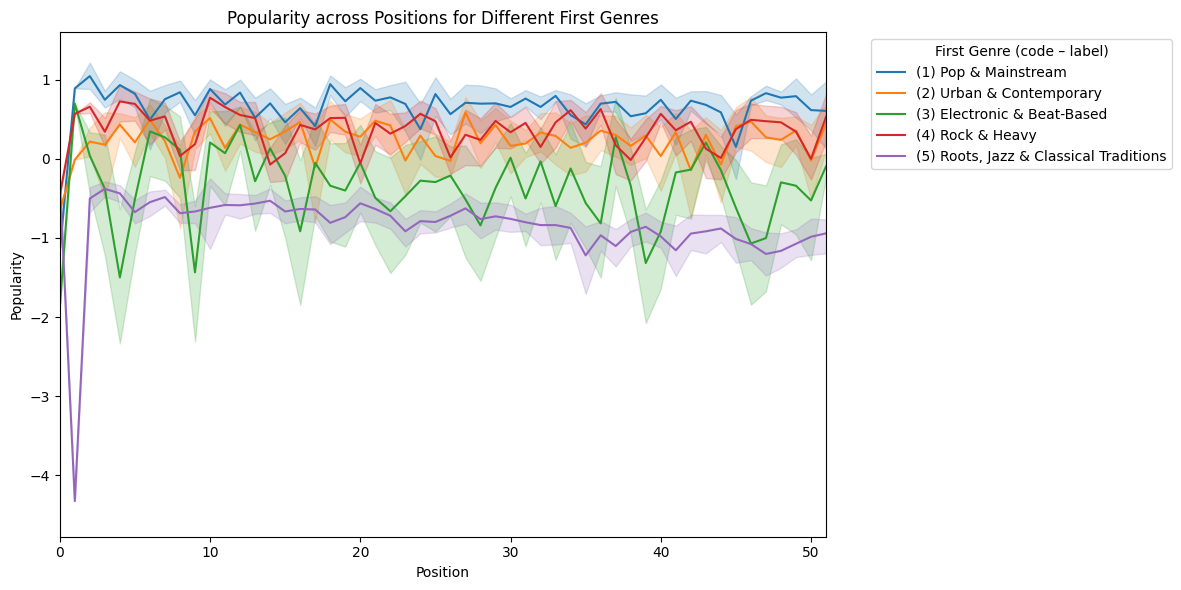

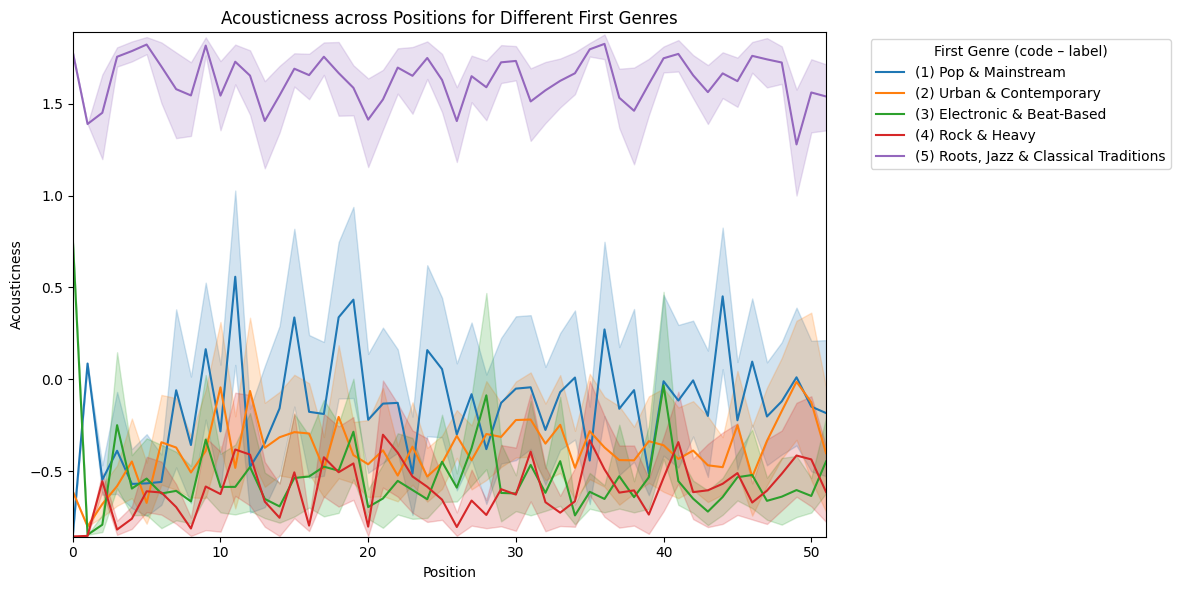

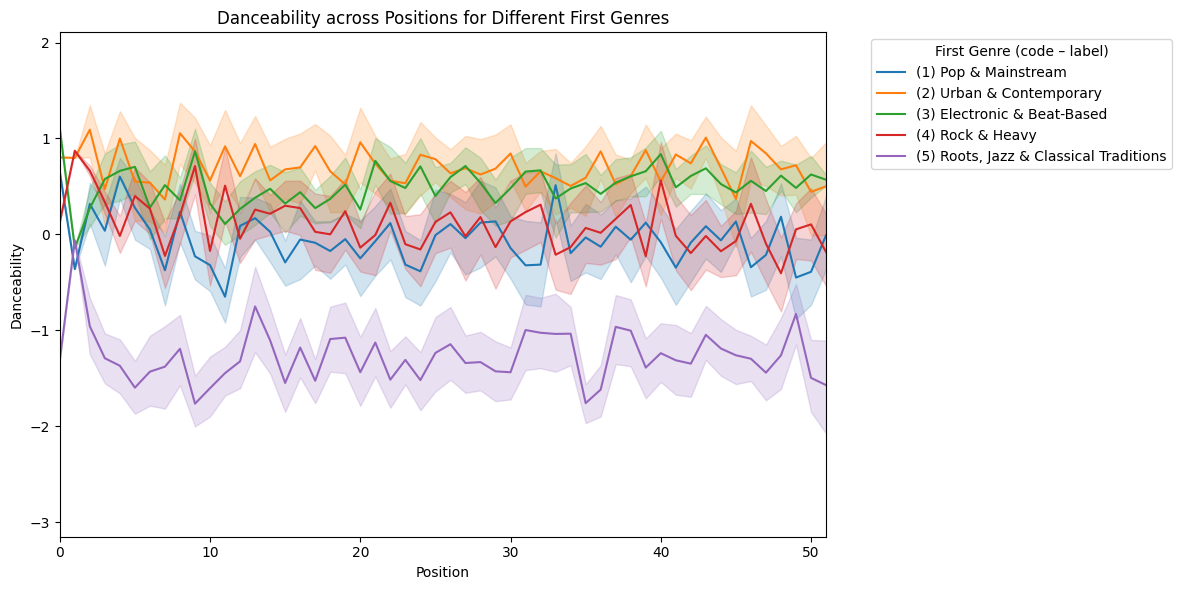

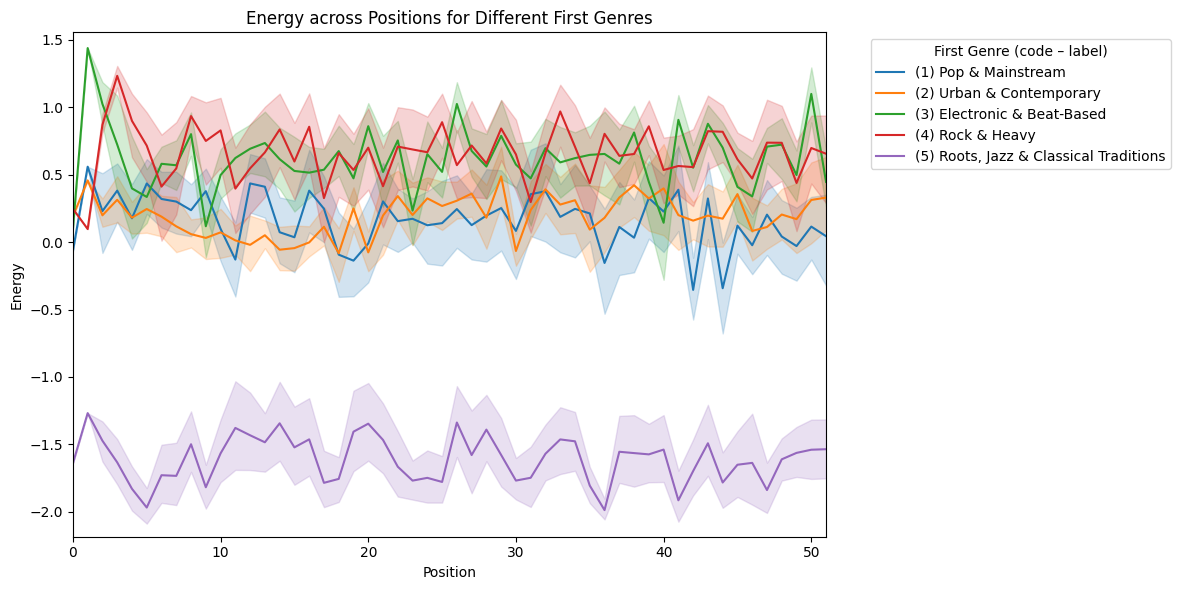

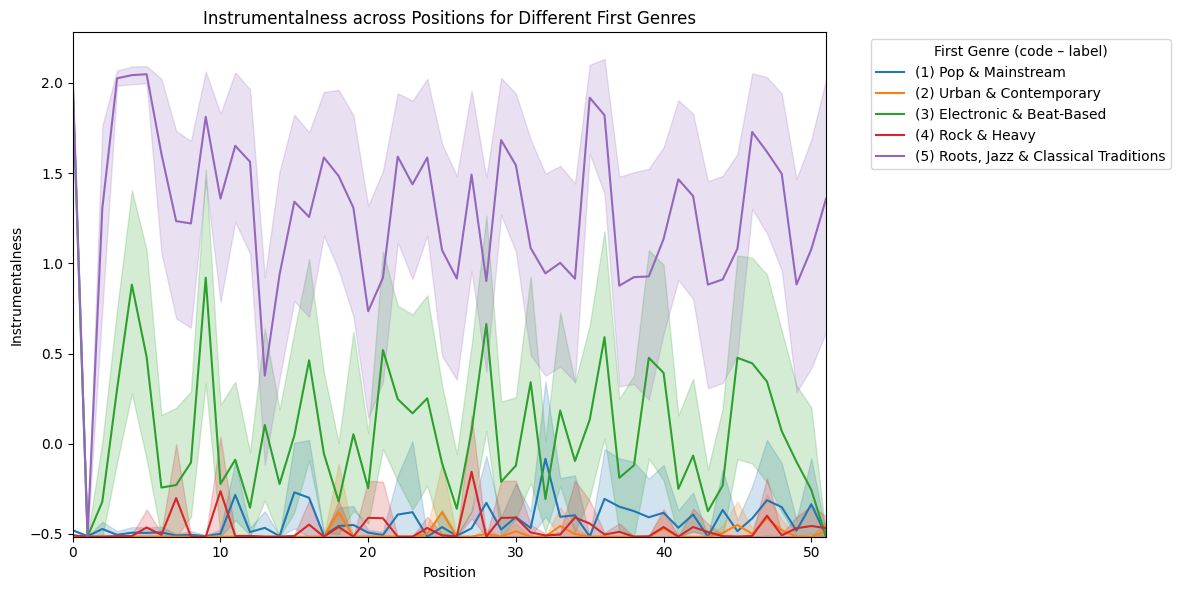

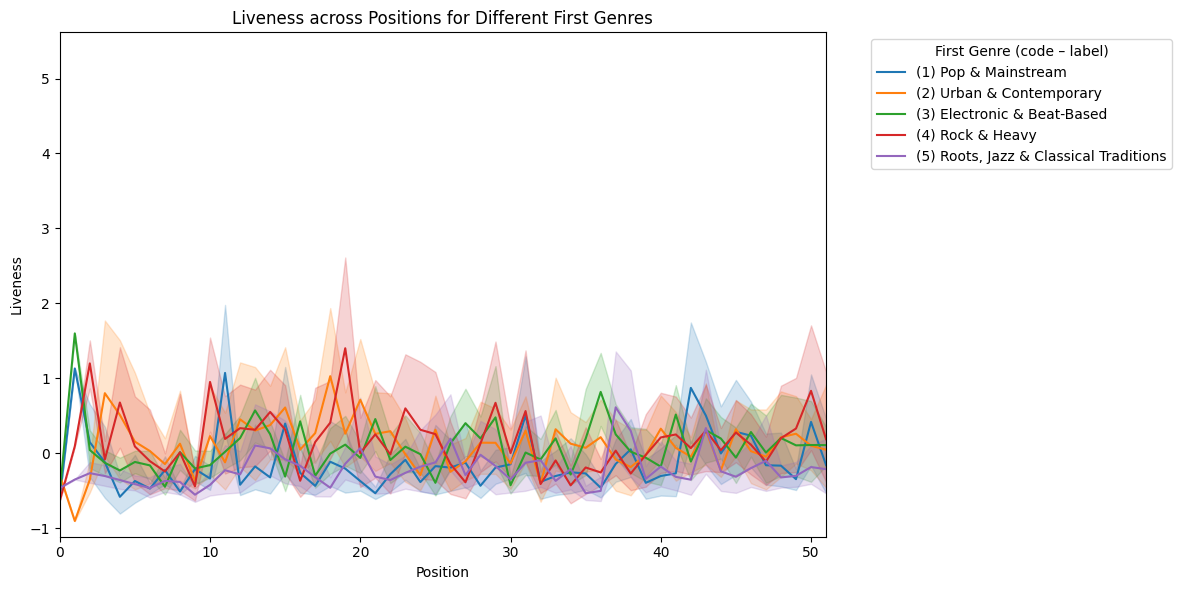

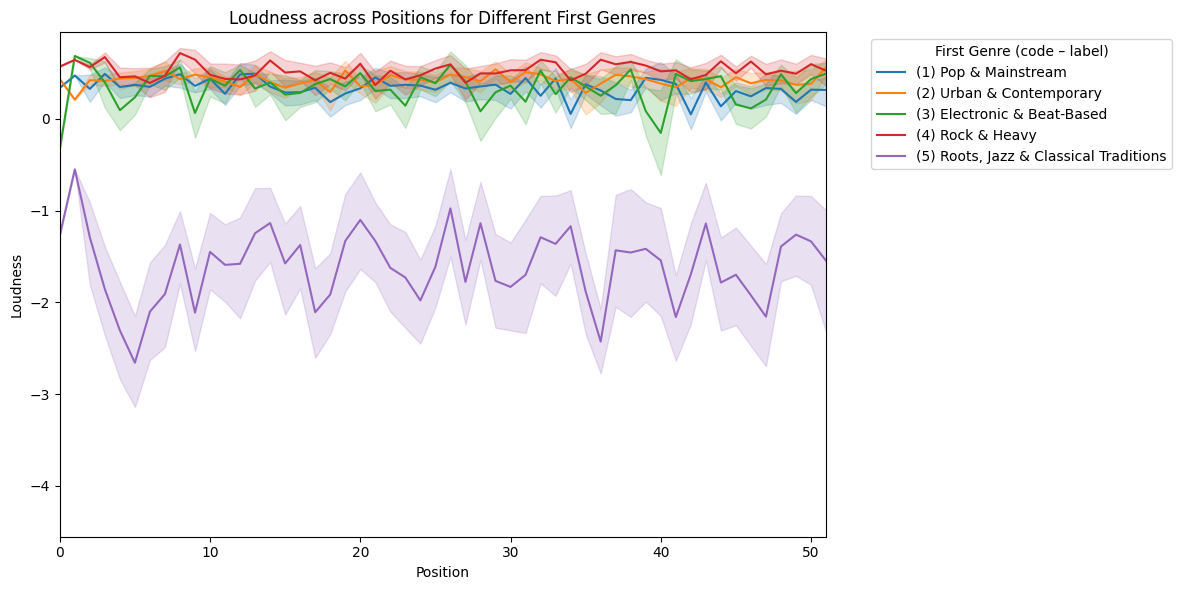

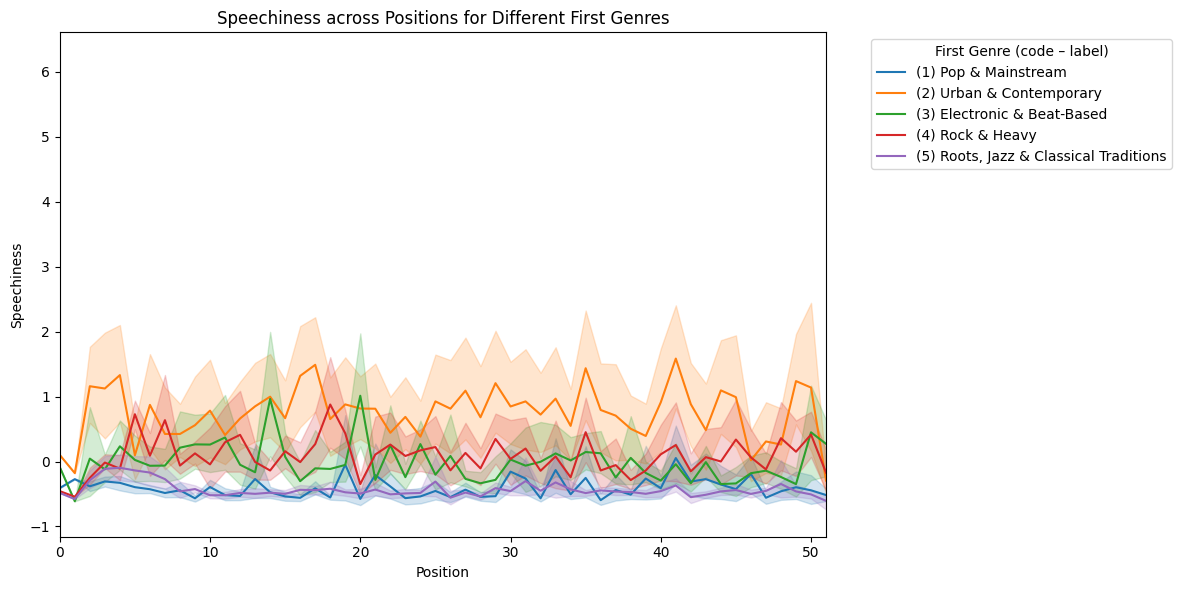

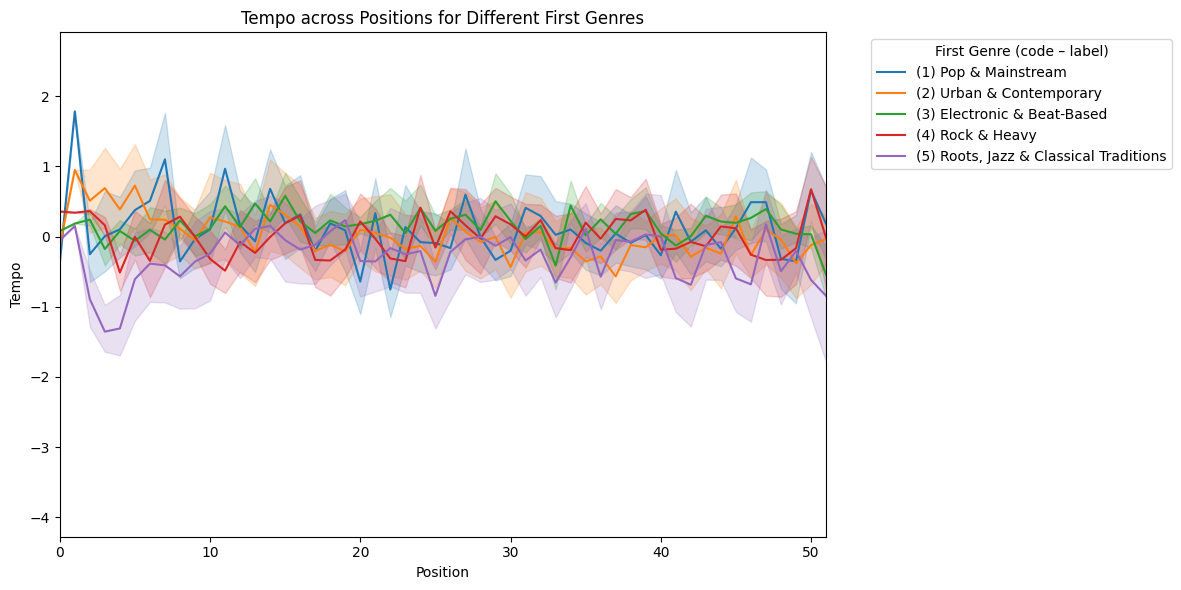

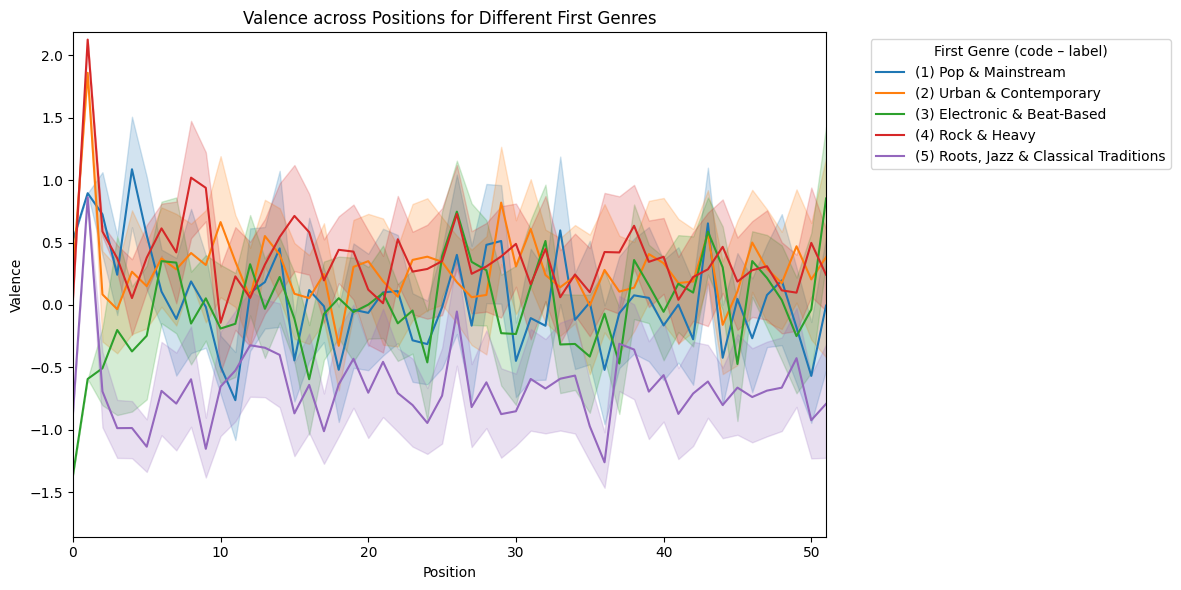

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        x='position',
        y=feature,
        hue='genre_label',
        data=data,
        palette='tab10',
        hue_order=      
    )
    plt.xlim(0, 51)
    plt.ylim(data[feature].min(), data[feature].max())
    plt.title(f'{feature.capitalize()} across Positions for Different First Genres')
    plt.xlabel('Position')
    plt.ylabel(feature.capitalize())
    plt.legend(
        title='First Genre (code – label)',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()

## 2) Distance based, Audio features as a vector
Considering distance from the 2 seed songs to other 48 songs as an output and positions as an input


In [27]:
from scipy.spatial.distance import hamming

In [32]:
data[audio_features]



data.sort_values(['user','first_genre','position'])

position                 played_at  duration_ms  explicit  \
50           0   2025-10-1T01:00:00:000Z       383972     False   
115          1   2025-10-1T02:00:00:000Z       175238      True   
265          2  2025-11-30T15:41:53.803Z       149667     False   
348          3  2025-11-30T15:44:26.741Z       158095     False   
413          4  2025-11-30T15:51:48.250Z       435571     False   
...        ...                       ...          ...       ...   
4223        47  2026-01-13T19:03:53.588Z       261466     False   
4310        48  2026-01-13T19:04:01.957Z       208666      True   
4401        49  2026-01-13T19:04:14.910Z       183956     False   
4464        50  2026-01-13T19:04:36.846Z       258986     False   
4565        51  2026-01-13T19:05:33.923Z       242484     False   

                    track_id                              track_name  \
50    7p6oXzBSPAXXz8Xb8gBPki                  Subzero - Original Mix   
115   4uUG5RXrOk84mYEfFvj3cK                         I'm Good (Blue)   
265   331l3xABO0HMr1Kkyh2LZq                      I Don't Wanna Wait   
348   2prnn41CblB8B4yWACDljP  Love Tonight (David Guetta Remix Edit)   
413   477I4wif0etzeupmlQzTxl             Wide Open - Len Faki DjEdit   
...                      ...                                     ...   
4223  3QaPy1KgI7nu9FJEQUgn6h                              WILDFLOWER   
4310  3DarAbFujv6eYNliUTyqtz                Kiss Me More (feat. SZA)   
4401  5XeFesFbtLpXzIVDNQP22n                        I Wanna Be Yours   
4464  3FSPaBp49Clqq2p4zc9dbA                              Photograph   
4565  0NLm9bQG7ikL5k9x9TtYT7                            Here With Me   

      popularity  first_genre                                            user  \
50     -1.878208            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond   
115     0.696076            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond   
265     0.438647            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond   
348     0.116862            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond   
413    -2.199993            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond   
...          ...          ...                                             ...   
4223    1.210932            1                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   
4310    0.760433            1                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   
4401    1.146575            1                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   
4464   -0.848494            1                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   
4565    0.760433            1                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   

     gender  ...  instrumentalness   key  liveness  loudness  mode  \
50        M  ...          1.960773   6.0 -0.523824 -0.328856   0.0   
115       M  ...         -0.515218   7.0  1.598218  0.687247   0.0   
265       M  ...         -0.515238   1.0  0.513393  0.566820   0.0   
348       M  ...          0.511401  10.0  0.138778  0.616828   0.0   
413       M  ...          2.029790   7.0 -0.526945  0.249424   1.0   
...     ...  ...               ...   ...       ...       ...   ...   
4223      M  ...         -0.514459   6.0  0.029515 -0.375291   0.0   
4310      M  ...         -0.514981   8.0 -0.360710  0.714037   1.0   
4401      M  ...         -0.451972   0.0 -0.537091 -0.036335   0.0   
4464      M  ...         -0.515175   NaN -0.446559  0.378015   NaN   
4565      M  ...         -0.515175   NaN -0.446559  0.378015   NaN   

      speechiness     tempo   valence                     artist  \
50      -0.086877  0.078965 -1.365010                  Ben Klock   
115     -0.611993  0.185342 -0.592371   David Guetta, Bebe Rexha   
265     -0.666096  0.252820  0.446122  David Guetta, OneRepublic   
348     -0.467188  0.114308 -1.710620       Shouse, David Guetta   
413      0.170907  0.184470 -1.459720   DJ Hyperactive, Len Faki   
...           ...       ...       ...                        ...   
4223    -0.471962  0.884560 -1.331778         

In [33]:
# function to compute per-user drift analysis
def user_drift_analysis(session):
    """
    Per-user: distances from genre-specific dual seeds
    
    Parameters:
    -----------
    session : pd.DataFrame
        Single user's playlist data with columns: 'user', 'position', 'first_genre', 
        continuous_features, categorical_features
    
    Returns:
    --------
    pd.DataFrame
        Drift metrics for positions 2-49:
        - user, position (2-49), user_seed_genre (1-5)
        - cont_drift (Euclidean continuous), cat_drift (Hamming categorical) 
        - total_drift = cont_drift + cat_drift
        
    Logic:
    ------
    1. Handle edge cases: <3 songs → empty; >49 songs → truncate to 49
    2. Extract user_seed_genre = int(session.iloc[0]['first_genre'])
    3. Dual seeds (pos 0+1):
       - Continuous: mean(seeds[continuous_features])
       - Categorical: mode(seeds[categorical_features])
    4. For pos 2-49: 
       cont_drift = ||seed_cont - song_cont||₂ (Euclidean)
       cat_drift  = hamming(seed_cat, song_cat) [0-1 normalized]
       total_drift = cont_drift + cat_drift
    """
    session = session.sort_values('position').reset_index(drop=True)
    
    # In case if user playlist consists of less than 3 songs 
    if len(session) < 3:
        return pd.DataFrame() # empty data frame
    
    # FIXED: User's seed genre (same for all 48 songs)
    user_seed_genre = int(session.iloc[0]['first_genre'])  # Genre 1-5 for this user
    
    # Dual seeds: pos 0+1 (guaranteed same genre)
    seeds = session[session['position'] <= 1]

    # 1) For continuous features, use the mean across the seed rows
    seed_cont = np.mean(seeds[continuous_features].values, axis=0).reshape(1, -1)
    
    # 2) For categorical features, use the mode (most common value) across the seed rows
    # and compute Hamming distance (proportion of differing categorical entries)
    seed_cat = seeds[categorical_features].mode().iloc[0].astype(int).values.reshape(1, -1)
    
    results = []
    
    # All 48 post-seed songs
    for _, song in session[session['position'] > 1].iterrows():
        song_cont = song[continuous_features].values.reshape(1, -1)
        song_cat  = song[categorical_features].astype(int).values.reshape(1, -1)
        
        # Calculating Euclidean distance for continuous features
        cont_drift = np.linalg.norm(seed_cont - song_cont)
        
        # Calculating Hamming distance for categorical features
        cat_drift = hamming(seed_cat.ravel(), song_cat.ravel()) # normalized distance
        
        # Total drift as sum of both
        total_drift = cont_drift + cat_drift
        
        results.append({
            'user': song['user'],
            'position': int(song['position']),  # 2-49
            'user_seed_genre': user_seed_genre,  # FIXED: User's genre (1-5)
            'cont_drift': float(cont_drift),
            'cat_drift': float(cat_drift),
            'total_drift': float(total_drift)
        })
    
    return pd.DataFrame(results)


In [34]:
# Generate: 89 users × 48 songs ~= 4272 but 4157
# Not all playlist has 50 songs
user_drifts = [user_drift_analysis(group) for _, group in data.groupby('user')]

all_user_drifts = pd.concat([df for df in user_drifts if len(df) > 0], ignore_index=True)

print(all_user_drifts.shape)

all_user_drifts

ValueError: cannot convert float NaN to integer

In [31]:
all_user_drifts.to_csv('89_user_48_song_drifts.csv', index=False)
print("\nColumns:", all_user_drifts.columns.tolist())
print("\nQuick stats by user_seed_genre:")
print(all_user_drifts.groupby('user_seed_genre')['total_drift'].agg(['mean', 'std', 'count']).round(3))


NameError: name 'all_user_drifts' is not defined

## 🎵 **Genre Drift Summary** (4,157 measurements)

| **Genre** | **Mean Drift** | **Std** | **Count** | **Seed Control** |
|-----------|----------------|---------|-----------|------------------|
| **1** (Pop) | **3.452** | 0.747 | 776 | Medium |
| **2** (Urban) | **4.132** | **1.215** | 826 | Weak |
| **3** (Electronic) | 3.578 | 0.811 | 827 | Medium |
| **4** (Rock) | **3.241** | 1.036 | **882** | **STRONGEST**  |
| **5** (Roots/Jazz) | **5.971** | 0.882 | 846 | **WEAKEST** |

### **Key Insights:**
- **Genre 4 (Rock & Heavy)**: **Lowest drift** → **Strongest seed control**
- **Genre 5 (Roots/Jazz/Classical)**: **Highest drift** → **Weakest seed control**  
- **Genre 2**: Most **variable** (highest std = inconsistent influence)

**Research Finding**: Seeds shape Rock playlists most, Classical least!


In [117]:

# Make sure this cell runs AFTER any place where genre_mapping is dictionary
genre_mapping = {
    1: 'Pop & Mainstream',
    2: 'Urban & Contemporary',
    3: 'Electronic & Beat-Based',
    4: 'Rock & Heavy',
    5: 'Roots, Jazz & Classical Traditions'
}
# Load your saved data
all_user_drifts = pd.read_csv('89_user_48_song_drifts.csv')

# Calculate mean + std by position and genre (~18 users per genre)
drift_stats = all_user_drifts.groupby(['position', 'user_seed_genre'])['total_drift'].agg(['mean', 'std', 'count']).reset_index()

print("Stats preview:")
print(drift_stats.head())
print(f"Genres: {sorted(all_user_drifts['user_seed_genre'].unique())}")
print(f"Positions: {all_user_drifts['position'].min()} → {all_user_drifts['position'].max()}")

drift_stats.shape 


Stats preview:
   position  user_seed_genre      mean       std  count
0         2                1  3.325962  0.191268     17
1         2                2  3.614987  1.166457     16
2         2                3  3.334617  0.939929     18
3         2                4  2.976860  0.207511     18
4         2                5  5.925531  0.954615     17
Genres: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Positions: 2 → 51


(250, 5)

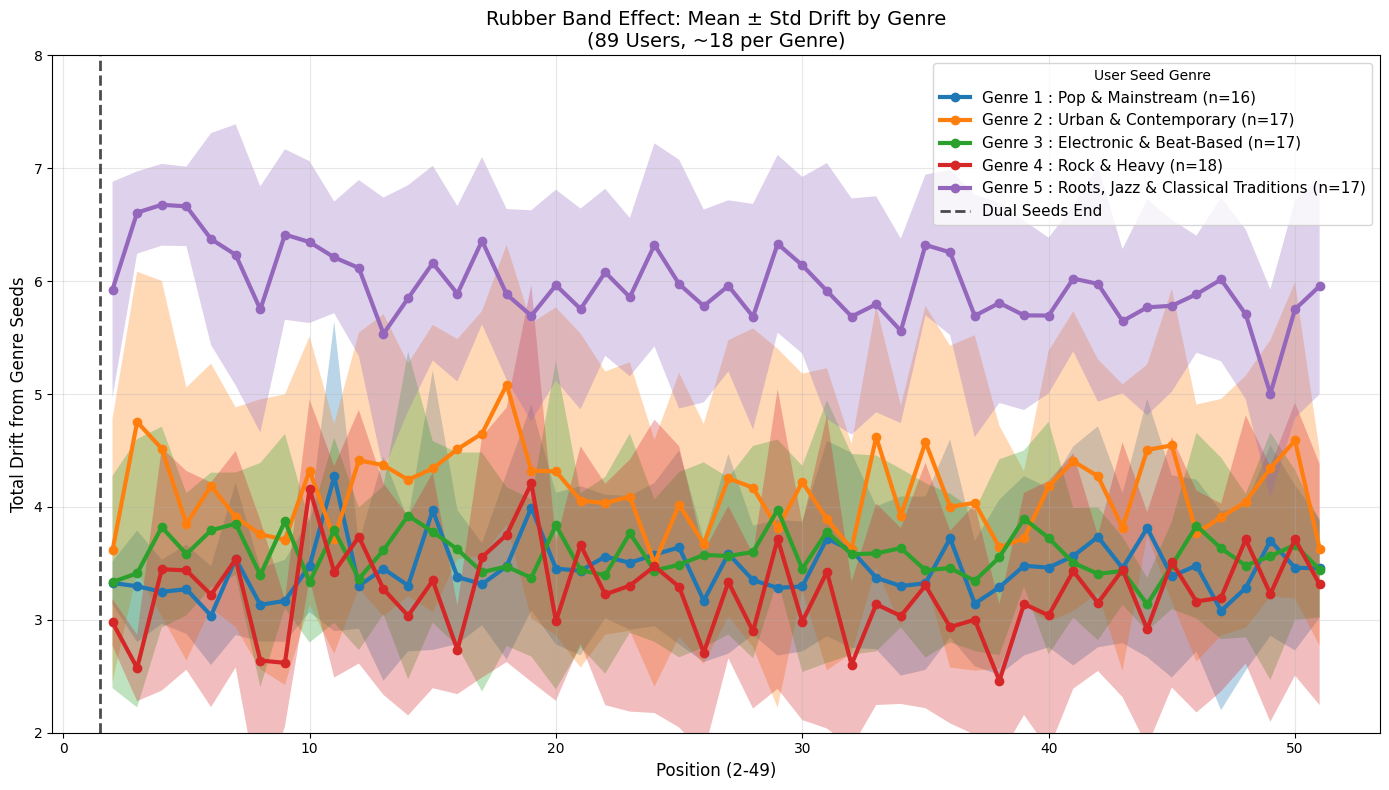

In [118]:
import seaborn as sns

# Plot 1: With Bands Mean ± 1 std, ~18 users per genre per position
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

    # Shaded std region
    plt.fill_between(genre_data['position'],genre_data['mean'] - genre_data['std'],genre_data['mean'] + genre_data['std'], alpha=0.3)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [119]:
# Filter positions 0 and 1 only (dual seeds)
dual_seed_data = data[data['position'] <= 1]

# Calculate dual seed profiles by first_genre
dual_seeds = dual_seed_data.groupby('first_genre')[audio_features].agg({
    # Continuous features: MEAN of pos 0+1
    **{feat: 'mean' for feat in continuous_features},
    
    # Categorical features: MODE (most common) of pos 0+1  
    **{feat: lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else -1 
        for feat in categorical_features}
})


dual_seeds['genre_label'] = dual_seeds.index.map(genre_mapping)
dual_seeds = dual_seeds.reset_index()

dual_seeds

first_genre  popularity  acousticness  danceability    energy  \
0            1   -0.195632     -0.386445      0.143857  0.238413   
1            2   -0.064109     -0.804867      0.788086  0.447352   
2            3   -0.655960     -0.044887      0.475250  0.755164   
3            4    0.001652     -0.857809      0.493809  0.163792   
4            5   -4.470109      1.386437     -0.060281 -1.265201   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  key  \
0         -0.493670  0.238938  0.403983    -0.348559  0.683688  0.680556  5.0   
1         -0.513179 -0.904590  0.210136    -0.192007  0.917963  1.805105  3.0   
2          0.730129  0.501162  0.179158    -0.357859  0.123993 -0.962703  6.0   
3         -0.509136 -0.287412  0.601664    -0.503561  0.334684  1.049327  0.0   
4         -0.513179 -0.365699 -0.538108    -0.581062  0.142895  0.832522  1.0   

   mode                         genre_label  
0   0.0                    Pop & Mainstream  
1   0.0                Urban & Contemporary  
2   0.0             Electronic & Beat-Based  
3   1.0                        Rock & Heavy  
4   1.0  Roots, Jazz & Classical Traditions

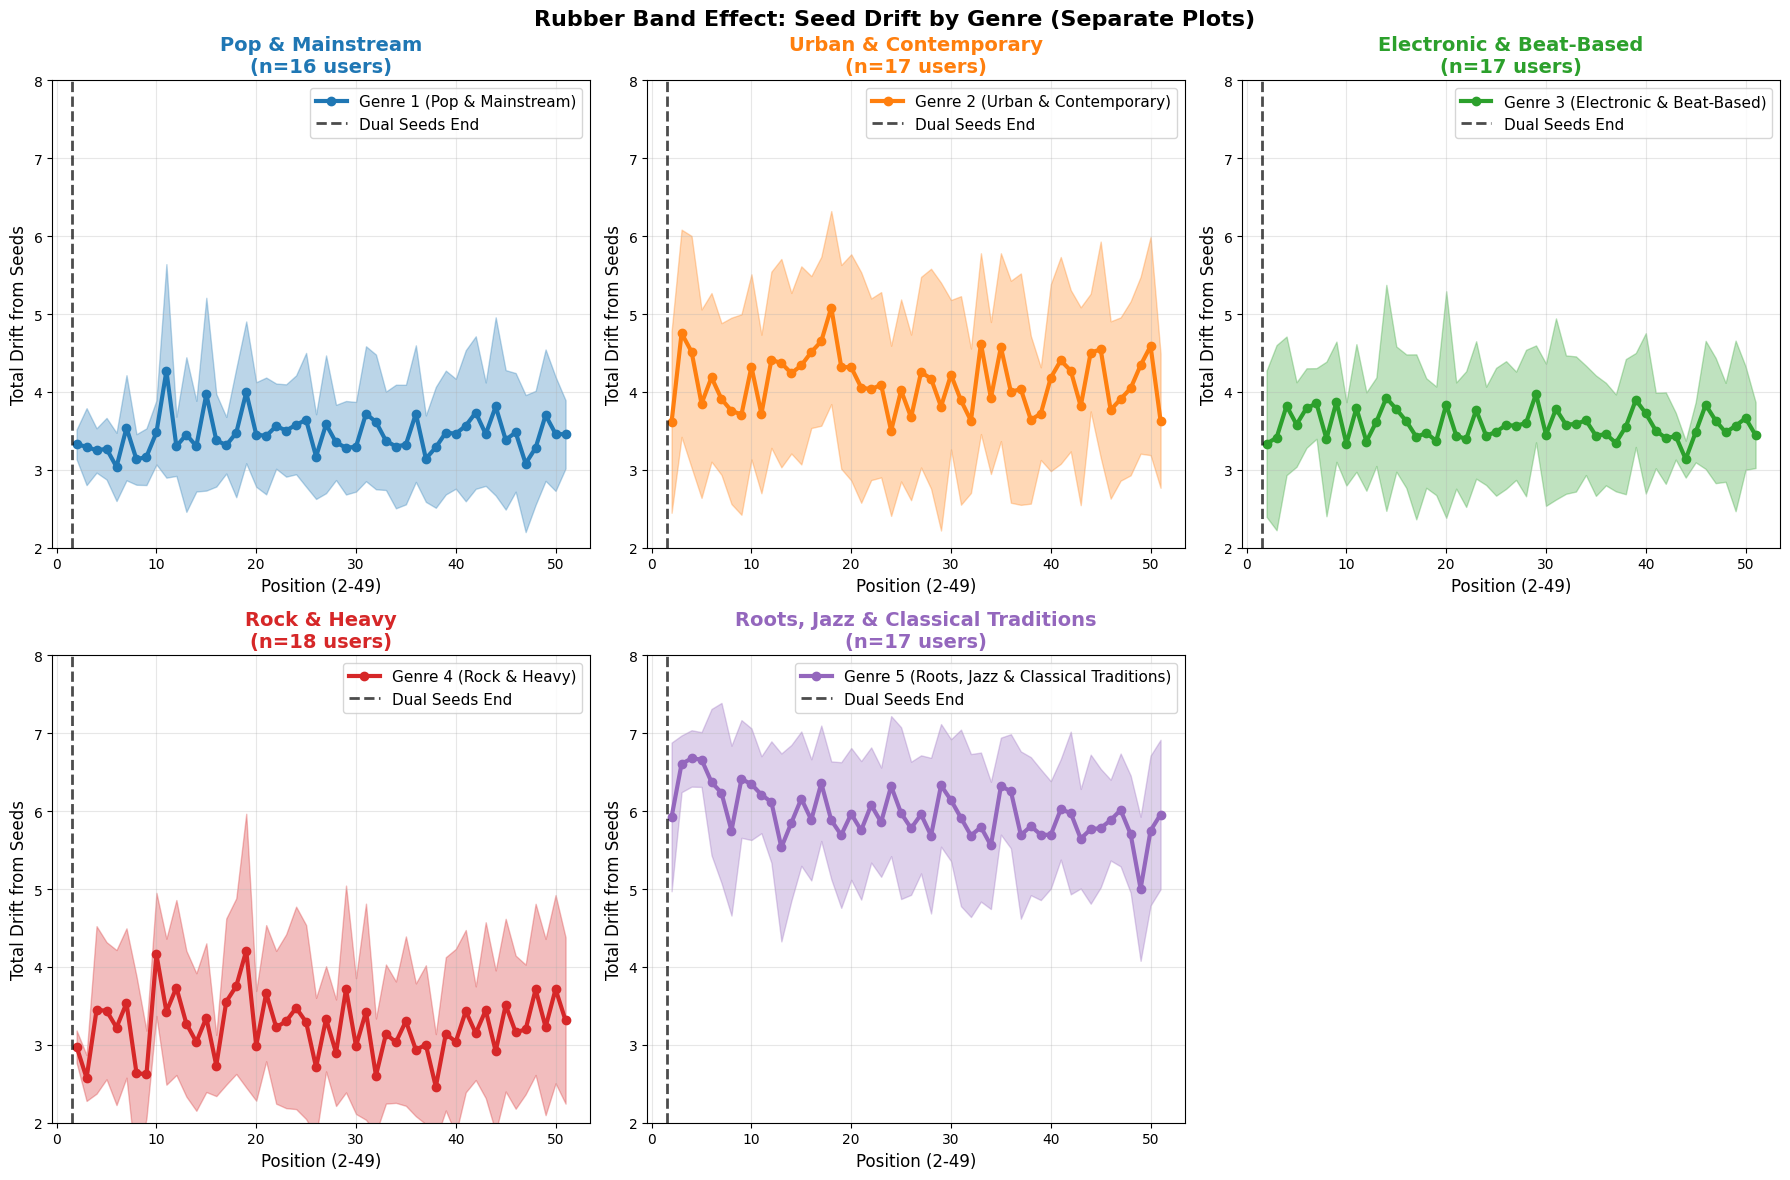

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# Get the same color palette as your original plot (tab10)
colors = sns.color_palette('tab10', n_colors=5)

# Genre order for consistent coloring
genres = sorted(all_user_drifts['user_seed_genre'].unique())  # [1,2,3,4,5]
genre_colors = {genre: colors[i] for i, genre in enumerate(genres)}

# Create separate subplot for each genre
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, genre in enumerate(genres):
    ax = axes[idx]
    
    # Filter data for this genre
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    # Plot mean line + shaded std region
    ax.plot(genre_data['position'], genre_data['mean'], 
            marker='o', linewidth=3, color=genre_colors[genre],
            label=f"Genre {int(genre)} ({genre_mapping[int(genre)]})")
    
    # Shaded confidence band (mean ± std)
    ax.fill_between(genre_data['position'], 
                   genre_data['mean'] - genre_data['std'], 
                   genre_data['mean'] + genre_data['std'], 
                   color=genre_colors[genre], alpha=0.3)
    
    # Formatting
    ax.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
    ax.set_xlabel('Position (2-49)', fontsize=12)
    ax.set_ylabel('Total Drift from Seeds', fontsize=12)
    ax.set_ylim(2, 8)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)
    
    ax.set_title(f'{genre_mapping[int(genre)]}\n(n={genre_data["count"].mean():.0f} users)', 
                 fontsize=14, fontweight='bold', color=genre_colors[genre])

# Hide empty subplot (if odd number of genres)
if len(genres) < 6:
    axes[-1].set_visible(False)

plt.suptitle('Rubber Band Effect: Seed Drift by Genre (Separate Plots)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


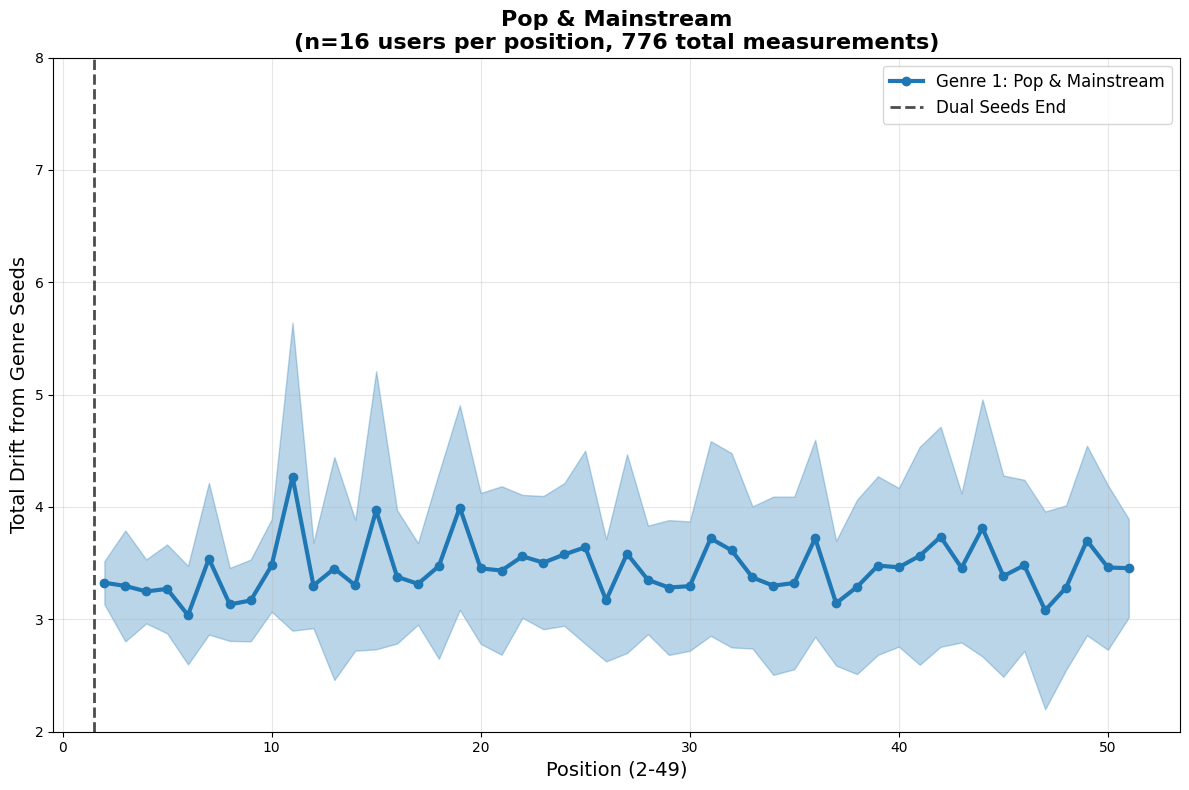

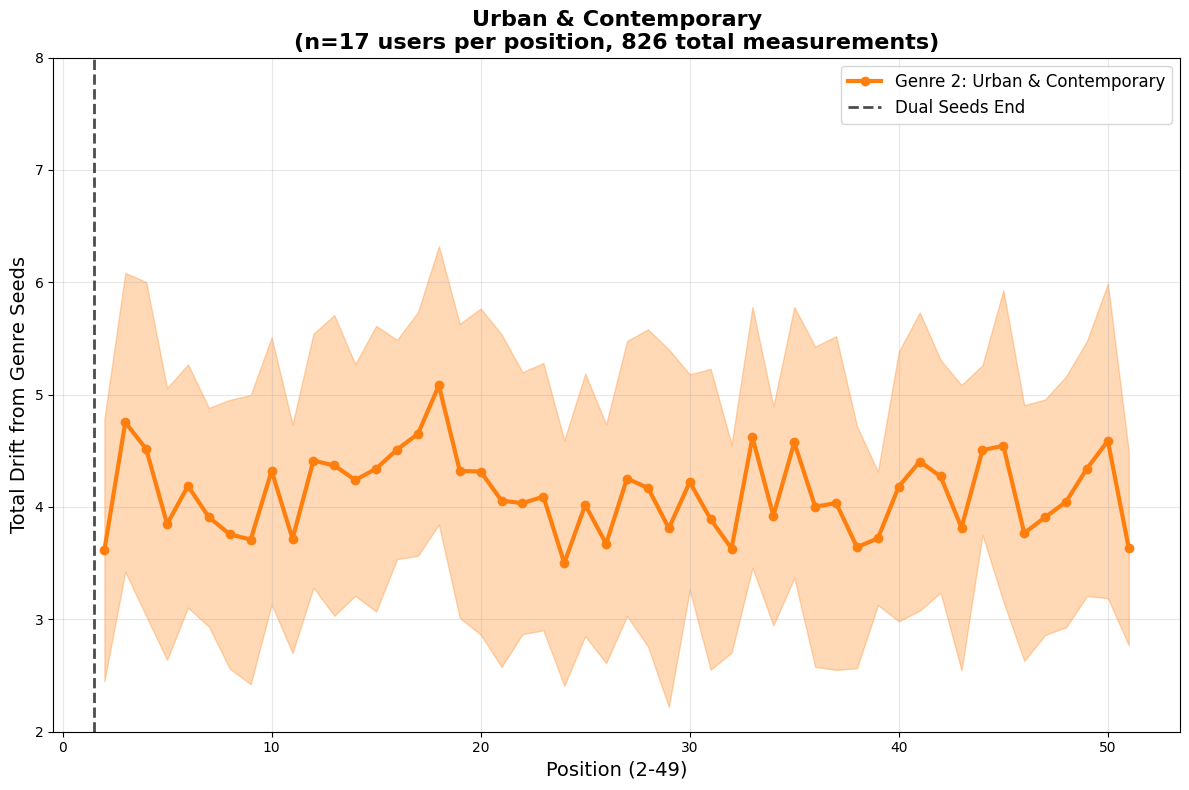

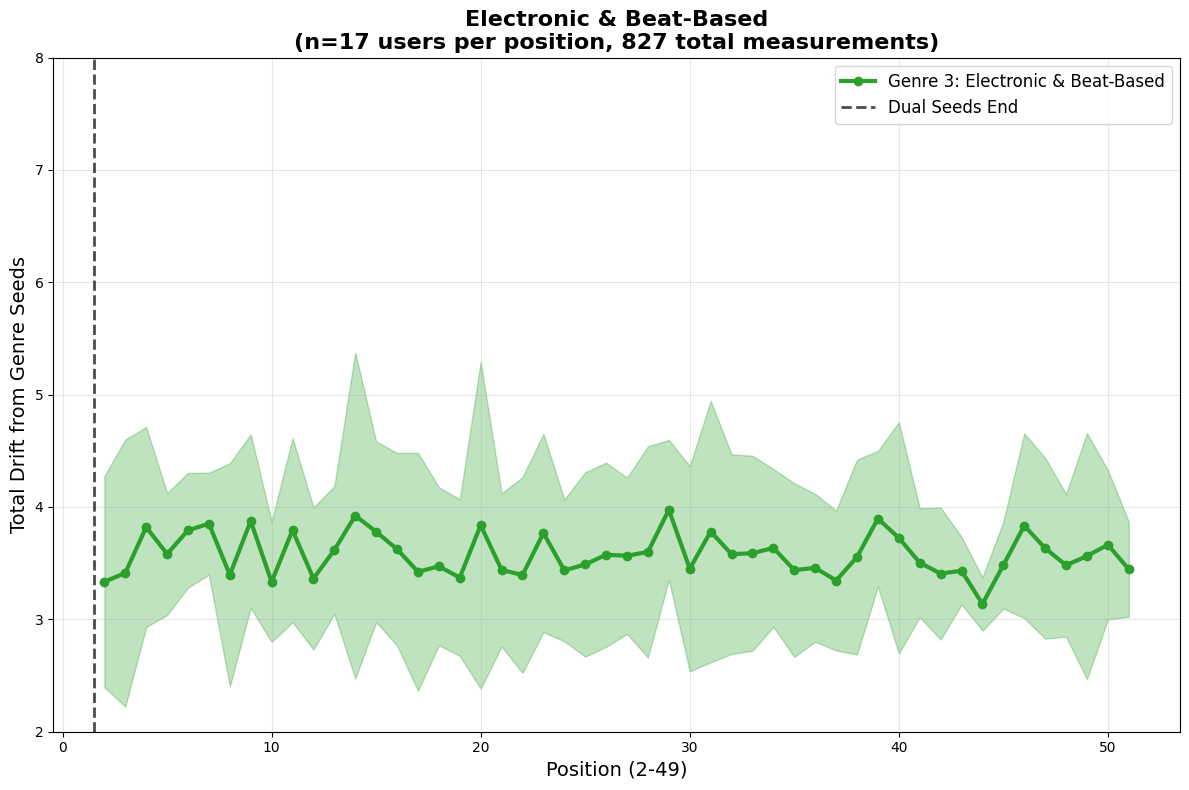

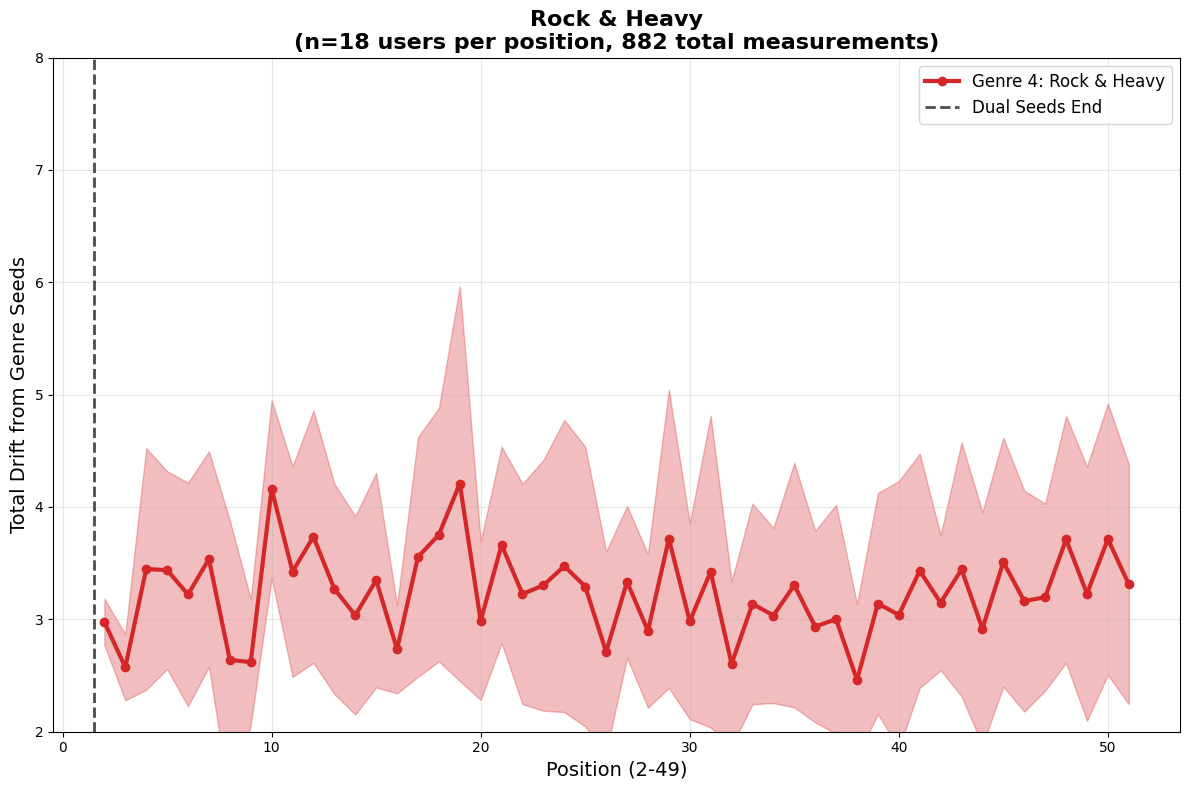

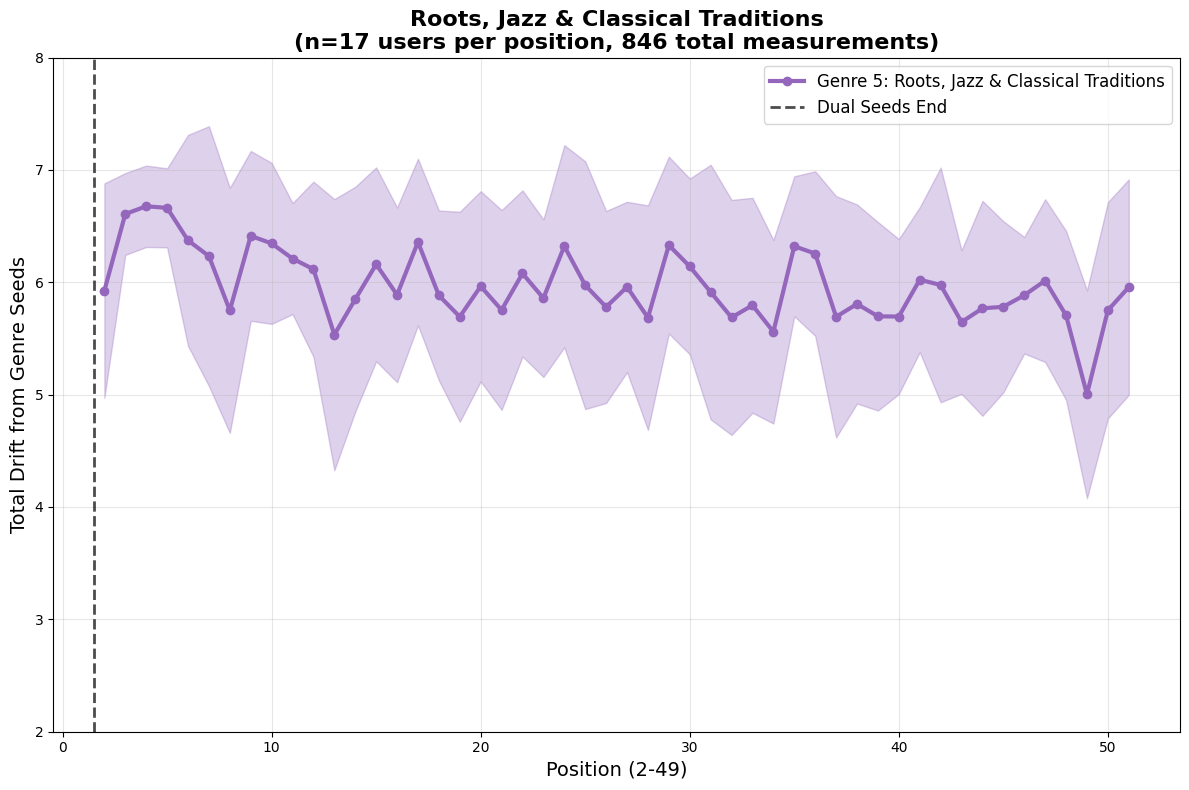

In [121]:
import matplotlib.pyplot as plt

# Same colors as original plot (tab10 palette)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Genre 1-5
genres = sorted(all_user_drifts['user_seed_genre'].unique())

# Create SEPARATE figure for EACH genre
for i, genre in enumerate(genres):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.figure(figsize=(12, 8))
    
    # Plot mean line + shaded std region
    plt.plot(genre_data['position'], genre_data['mean'], 
             marker='o', linewidth=3, color=colors[i],
             label=f"Genre {int(genre)}: {genre_mapping[int(genre)]}")
    
    # Shaded std region (mean ± 1 std)
    plt.fill_between(genre_data['position'], 
                    genre_data['mean'] - genre_data['std'], 
                    genre_data['mean'] + genre_data['std'], 
                    color=colors[i], alpha=0.3)
    
    # Formatting (same as original)
    plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
    plt.xlabel('Position (2-49)', fontsize=14)
    plt.ylabel('Total Drift from Genre Seeds', fontsize=14)
    plt.title(f'{genre_mapping[int(genre)]}\n'
              f'(n={genre_data["count"].mean():.0f} users per position, {genre_data["count"].sum()} total measurements)', 
              fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(2, 8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


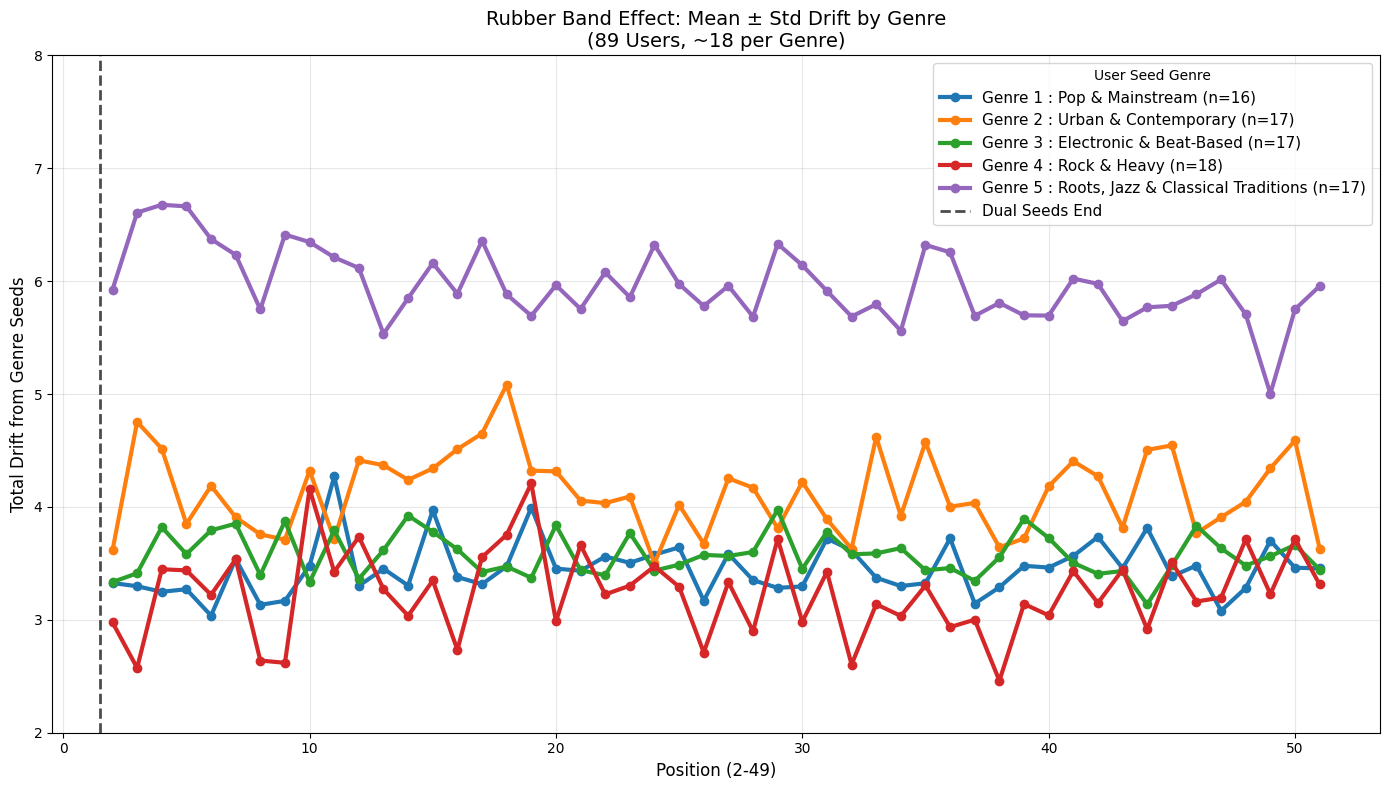

In [122]:
# Plot 2 : Witout Std Bands
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 1. Statistical Significance Testing

In [ ]:
# Per-genre feature drift contribution
feature_drifts = {}
for genre in [1,2,3,4,5]:
    seed_profile = dual_seeds[dual_seeds['first_genre']==genre][continuous_features].mean()
    for pos in range(2,51):  # Post-seed positions
        track_means = data[(data['first_genre']==genre) & 
                                     (data['position']==pos)][continuous_features].mean()
        feature_drifts[f'G{int(genre)}_P{pos}'] = (track_means - seed_profile).abs()


feature_drifts

dict

In [ ]:
for genre_id in [1,2,3,4,5]:

    genre_seeds = data[(data['frist_genre'] == genre_id) & (data['position'].isin([0, 1]))]
    


In [1]:
data[(data['frist_genre'] == 1) & (data['position'].isin([0, 1]))]

NameError: name 'data' is not defined